In [1]:
# 导入数据包依赖
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('./matrix.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1990,Unnamed: 1991,Unnamed: 1992,Unnamed: 1993,Unnamed: 1994,Unnamed: 1995,Unnamed: 1996,Unnamed: 1997,Unnamed: 1998,Unnamed: 1999
0,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0,0,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.columns = list(range(2000))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0,0,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
outer = pd.read_excel('outer.xlsx')
x = outer['x']
# colors = ['#FFB6C1', '#FFC0CB', '#DC143C', '#FFF0F5', '#DB7093', '#FF69B4', '#FF1493', '#C71585', '#DA70D6', '#D8BFD8']
colors = ['#fc853e','#28cad8','#9564bf','#bd407e','#28cad8','#e5a214']
# symbolSizes = [120,110,100,90,80,70,60,50,40,30]
symbolSizes = [70,60,50,40,30,20]
def getConf(i):
    if i>168: res = [colors[0], symbolSizes[0]]
    elif i>148: res = [colors[1], symbolSizes[1]]
    elif i>128: res = [colors[2], symbolSizes[2]]
    elif i>108: res = [colors[3], symbolSizes[3]]
    elif i>88: res = [colors[4], symbolSizes[4]]
    elif i>68: res = [colors[5], symbolSizes[5]]
    else: res = None

    return res


In [37]:
# df.loc[2,0]
nodes = []
links = []
for i in range(2000):
    conf = getConf(x[i])
    if conf:
        nodes.append({
            'name': i,
            'symbolSize': conf[1],
            'itemStyle': {
                'color': conf[0]
            }
        })
    else:
        nodes.append({
            'name': i
        })
    for j in range(2000):
        if df.loc[i,j] == 1:
            links.append({
                'source': i,
                'target': j
            })

In [ ]:
print(nodes)

In [ ]:
print(links)

In [4]:
for index,row in df.iterrows():
    print(row)


a    1
b    3
Name: 0, dtype: int64
a    2
b    2
Name: 1, dtype: int64
a    3
b    1
Name: 2, dtype: int64


(892, 2)


Text(-2.3, 1.2, 'UCM Polarity ε=0.2 μ=0.13')

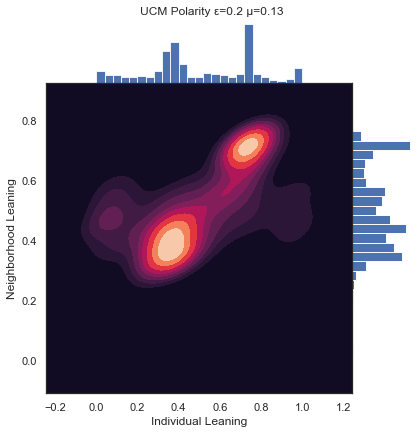

In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# plt.figure(dpi=100, figsize=(12, 8))
sns.set_theme(style="white")
# sns.set_title(title='123')
df = pd.read_excel('./相图1.xlsx')
df.rename(columns={'y':'Neighborhood Leaning','x':'Individual Leaning'}, inplace=True)
print(df.shape)
# y = [round(i,2) for i in df['Neighborhood Leaning']]
# x = [round(i,2) for i in df['Individual Leaning']]
# df['Individual Leaning'] = x
# df['Neighborhood Leaning'] = y

# g = sns.JointGrid(data=df, x="Individual Leaning", y="Neighborhood Leaning", space=0,xlim=0.01,ylim=0.011)
g = sns.JointGrid(data=df, x="Individual Leaning", y="Neighborhood Leaning", space=0)

g.plot_joint(sns.kdeplot,
             fill=True, cmap="rocket",thresh=0)
g.plot_marginals(sns.histplot, alpha=1, bins=25)

# plt.rcParams['font.sans-serif']=['SimHei'] # 显示中文
plt.title('UCM Polarity ε=0.2 μ=0.13', fontsize=12, x=-2.3,y=1.2)
# g.set(xticks=np.arange(0.1, 1, 0.1))